In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('zomato.csv',encoding='latin-1')

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9542 non-null int64
Restaurant Name         9542 non-null object
Country Code            9542 non-null int64
City                    9542 non-null object
Address                 9542 non-null object
Locality                9542 non-null object
Locality Verbose        9542 non-null object
Longitude               9542 non-null float64
Latitude                9542 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9542 non-null int64
Currency                9542 non-null object
Has Table booking       9542 non-null object
Has Online delivery     9542 non-null object
Is delivering now       9542 non-null object
Switch to order menu    9542 non-null object
Price range             9542 non-null int64
Aggregate rating        9542 non-null float64
Rating color            9542 non-null object
Rating text             9542 non-null o

In [8]:
data.drop(columns=['Restaurant ID','Switch to order menu','Is delivering now'],inplace=True)

In [9]:
data.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [10]:
data['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [11]:
data['Country Code'].value_counts()

1      8652
216     425
215      80
214      60
30       60
189      60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64

In [12]:
data=data[data['Country Code']==1]

In [13]:
data.shape

(8652, 18)

In [14]:
data.drop(columns=['Country Code','Currency','Restaurant Name'],inplace=True)

In [15]:
data.columns

Index(['City', 'Address', 'Locality', 'Locality Verbose', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [16]:
data=data[data['City'].isin(['New Delhi','Gurgaon','Noida','Faridabad'])]

In [17]:
data

,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
865,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,No,No,1,2.9,Orange,Average,4
866,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,No,No,2,2.8,Orange,Average,16
867,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,150,No,No,1,2.8,Orange,Average,8
868,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,150,No,No,1,2.9,Orange,Average,8
869,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,100,No,No,1,2.8,Orange,Average,7
870,Faridabad,"A-68/5, Near Mehra Petrol Pump, Main Tajpur Ro...",Badarpur Border,"Badarpur Border, Faridabad",77.305383,28.490120,"Chinese, North Indian, Fast Food",300,No,No,1,3.0,Orange,Average,4
871,Faridabad,"Badarpur Border Chowk Post, Badarpur Border, F...",Badarpur Border,"Badarpur Border, Faridabad",77.302742,28.496292,Mithai,100,No,No,1,0.0,White,Not rated,1
872,Faridabad,"Near Seble Cinema, Dharamveer Market, Badarpur...",Badarpur Border,"Badarpur Border, Faridabad",77.303542,28.495915,North Indian,100,No,No,1,0.0,White,Not rated,3
873,Faridabad,"B-222, Shishram Complex, Main Market, Badarpur...",Badarpur Border,"Badarpur Border, Faridabad",0.000000,0.000000,"North Indian, Mughlai, Chinese",400,No,No,1,0.0,White,Not rated,3
874,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,300,No,No,1,0.0,White,Not rated,0


In [18]:
avgPrice=data.groupby('Cuisines').mean()['Average Cost for two'].reset_index()

In [19]:
data=data.merge(avgPrice,on='Cuisines')

In [20]:
data

,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two_x,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost for two_y
0,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,No,No,1,2.9,Orange,Average,4,375.000000
1,New Delhi,"Shop 3, Plot 1161, Opposite Old Sabji Mandi, K...",Narela,"Narela, New Delhi",77.049525,28.806199,"Chinese, Fast Food, Bakery",500,No,No,2,0.0,White,Not rated,0,375.000000
2,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,No,No,2,2.8,Orange,Average,16,594.303797
3,Faridabad,"158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...",Charmwood Village,"Charmwood Village, Faridabad",0.000000,0.000000,"North Indian, Chinese",300,No,No,1,0.0,White,Not rated,0,594.303797
4,Faridabad,"Hotel Saffron Kiran, 12/6, Adjacent to Badarpu...","Hotel Saffron Kiran, Faridabad","Hotel Saffron Kiran, Faridabad, Faridabad",77.305698,28.471985,"North Indian, Chinese",1200,Yes,No,3,0.0,White,Not rated,0,594.303797
5,Faridabad,"3G/1, NIT, Faridabad",NIT,"NIT, Faridabad",77.292278,28.398268,"North Indian, Chinese",400,No,No,1,0.0,White,Not rated,0,594.303797
6,Faridabad,"J-121, Near Lean Wolf Gym, Sector 10, Faridabad",Sector 10,"Sector 10, Faridabad",77.329161,28.375486,"North Indian, Chinese",450,No,No,1,2.8,Orange,Average,20,594.303797
7,Faridabad,"J140, Sector 10, Faridabad",Sector 10,"Sector 10, Faridabad",77.328898,28.377754,"North Indian, Chinese",700,Yes,No,2,2.9,Orange,Average,13,594.303797
8,Faridabad,"18, DLF Market, Sector 11, Faridabad",Sector 11,"Sector 11, Faridabad",77.318483,28.371951,"North Indian, Chinese",450,No,No,1,2.6,Orange,Average,26,594.303797
9,Faridabad,"11-12 Dividing Road, Sector 12, Faridabad",Sector 12,"Sector 12, Faridabad",77.314446,28.381192,"North Indian, Chinese",550,No,No,2,0.0,White,Not rated,0,594.303797


In [21]:
data.rename(columns={'Average Cost for two_y':'Cuisine','Average Cost for two_x': 'Target'},inplace=True)

In [22]:
data.drop(columns=['Address','Locality','Locality Verbose','Cuisines'],inplace=True)

In [23]:
data['Has Table booking'].value_counts()

No     6876
Yes    1046
Name: Has Table booking, dtype: int64

In [24]:
data['Has Table booking'].replace("No",0,inplace=True)
data['Has Table booking'].replace("Yes",1,inplace=True)

In [25]:
data['Has Table booking'].value_counts()

0    6876
1    1046
Name: Has Table booking, dtype: int64

In [26]:
data['Has Online delivery'].value_counts()

No     5609
Yes    2313
Name: Has Online delivery, dtype: int64

In [27]:
data['Has Online delivery'].replace("No",0,inplace=True)
data['Has Online delivery'].replace("Yes",1,inplace=True)

In [28]:
data['Has Online delivery'].value_counts()

0    5609
1    2313
Name: Has Online delivery, dtype: int64

In [29]:
data.columns

Index(['City', 'Longitude', 'Latitude', 'Target', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Cuisine'],
      dtype='object')

In [30]:
data['Rating color'].value_counts()

Orange        3571
White         2137
Yellow        1580
Green          413
Red            178
Dark Green      43
Name: Rating color, dtype: int64

In [31]:
data['Rating text'].value_counts()

Average      3571
Not rated    2137
Good         1580
Very Good     413
Poor          178
Excellent      43
Name: Rating text, dtype: int64

In [32]:
data.corr()['Target']

Longitude              0.071752
Latitude               0.070993
Target                 1.000000
Has Table booking      0.642966
Has Online delivery    0.076953
Price range            0.847985
Aggregate rating       0.328440
Votes                  0.299089
Cuisine                0.808274
Name: Target, dtype: float64

In [33]:
data.drop(columns=['Rating color','Has Online delivery'],inplace=True)

In [34]:
data.head()

,City,Longitude,Latitude,Target,Has Table booking,Price range,Aggregate rating,Rating text,Votes,Cuisine
0,Faridabad,77.306640,28.490059,250,0,1,2.9,Average,4,375.000000
1,New Delhi,77.049525,28.806199,500,0,2,0.0,Not rated,0,375.000000
2,Faridabad,77.304776,28.490157,500,0,2,2.8,Average,16,594.303797
3,Faridabad,0.000000,0.000000,300,0,1,0.0,Not rated,0,594.303797
4,Faridabad,77.305698,28.471985,1200,1,3,0.0,Not rated,0,594.303797


In [35]:
y=data['Target'].values
y

array([ 250,  500,  500, ...,  450, 1000,  450], dtype=int64)

In [192]:
input1=data.drop(columns='Target')
X=input1.iloc[:,:].values

In [124]:
input1.tail()

,City,Longitude,Latitude,Has Table booking,Price range,Aggregate rating,Rating text,Votes,Cuisine
7917,Noida,77.341021,28.585493,1,4,2.2,Poor,116,2500.0
7918,Noida,77.364833,28.597103,0,1,3.0,Average,10,200.0
7919,Noida,77.364833,28.597103,0,1,3.5,Good,105,450.0
7920,Noida,77.323213,28.567751,1,3,0.0,Not rated,0,1000.0
7921,Noida,77.325308,28.567150,0,1,2.0,Poor,161,450.0


In [193]:
X.shape

(7922, 9)

In [194]:
y.shape

(7922,)

In [104]:
data['City'].nunique()

4

In [105]:
data['Rating text'].nunique()

6

### Encoding X[ City ] and X[ Rating text ]

#### Label Encoding

In [195]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder1=LabelEncoder()

In [196]:
X[:,0]=encoder.fit_transform(X[:,0])
X[:,-3]=encoder1.fit_transform(X[:,-3])

In [197]:
X[0]

array([0, 77.3066401, 28.4900591, 0, 1, 2.9, 0, 4, 375.0], dtype=object)

#### OneHotEncoding

In [198]:
from sklearn.preprocessing import OneHotEncoder
oencoder=OneHotEncoder(categorical_features=[0,-3])

In [199]:
X=oencoder.fit_transform(X).toarray()
X.shape

(7922, 17)

In [200]:
X[0:5]

array([[  1.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  77.3066401 ,  28.4900591 ,
          0.        ,   1.        ,   2.9       ,   4.        ,
        375.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  77.04952508,  28.80619877,
          0.        ,   2.        ,   0.        ,   0.        ,
        375.        ],
       [  1.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  77.304776  ,  28.4901567 ,
          0.        ,   2.        ,   2.8       ,  16.        ,
        594.30379747],
       [  1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [141]:
X_train.shape

(6337, 17)

In [142]:
X_train[0]

array([  0.        ,   1.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  77.0424589 ,  28.4740845 ,
         0.        ,   2.        ,   3.2       ,  52.        ,
       594.30379747])

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
regressor=LinearRegression()

In [145]:
%time regressor.fit(X_train,y_train)

Wall time: 15.6 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
y_pred=regressor.predict(X_test)
y_pred.shape

(1585,)

In [147]:
y_test.shape

(1585,)

In [148]:
from sklearn.metrics import r2_score

In [149]:
r2_score(y_test,y_pred)

0.7849757462288165

0.8052662412440119


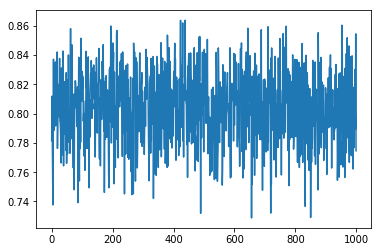

In [215]:
score=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    score.append(r2_score(y_test,y_pred))
print(np.median(np.array(score)))
plt.plot(score)